In [35]:
import pandas as pd

data = pd.read_csv('data/heart.csv', sep=',')
display(data.head())
display(data.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [36]:
data['old'] = data['age'].apply(lambda x: 1 if x > 60 else 0)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [37]:
data['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [38]:
def get_mean_threstbps(row) -> int:
    age = row['age']
    sex = row['sex']
    if age <= 20:
        return 123 if sex else 116
    elif age >= 21 and age <= 30:
        return 126 if sex else 120
    elif age >= 31 and age <= 40:
        return 129 if sex else 127
    elif age >= 41 and age <= 50:
        return 135 if sex else 137
    elif age >= 51 and age <= 60:
        return 142 if sex else 144
    else:
        return 142 if sex else 159

data['trestbps_mean'] = data.apply(get_mean_threstbps, axis=1)
data['trestbps_mean'][300]

142

In [39]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


![dataset_attrs](images/dataset_attrs.png)

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

In [40]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True)
data_bin = encoder.fit_transform(data[['cp', 'restecg', 'slope', 'ca', 'thal']])
data = pd.concat([data, data_bin], axis=1)
data.drop(columns=['cp', 'restecg', 'slope', 'ca', 'thal'], inplace=True)

display(data.head())
display(data.shape[1])

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0


30

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [42]:
from sklearn import preprocessing

col_names = list(data.columns)

r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(data)
data_r = pd.DataFrame(data_r, columns=col_names)

round(data_r['chol'].std(), 6)

0.816232

Проведите корреляционный анализ и отберите признаки для будущей модели.

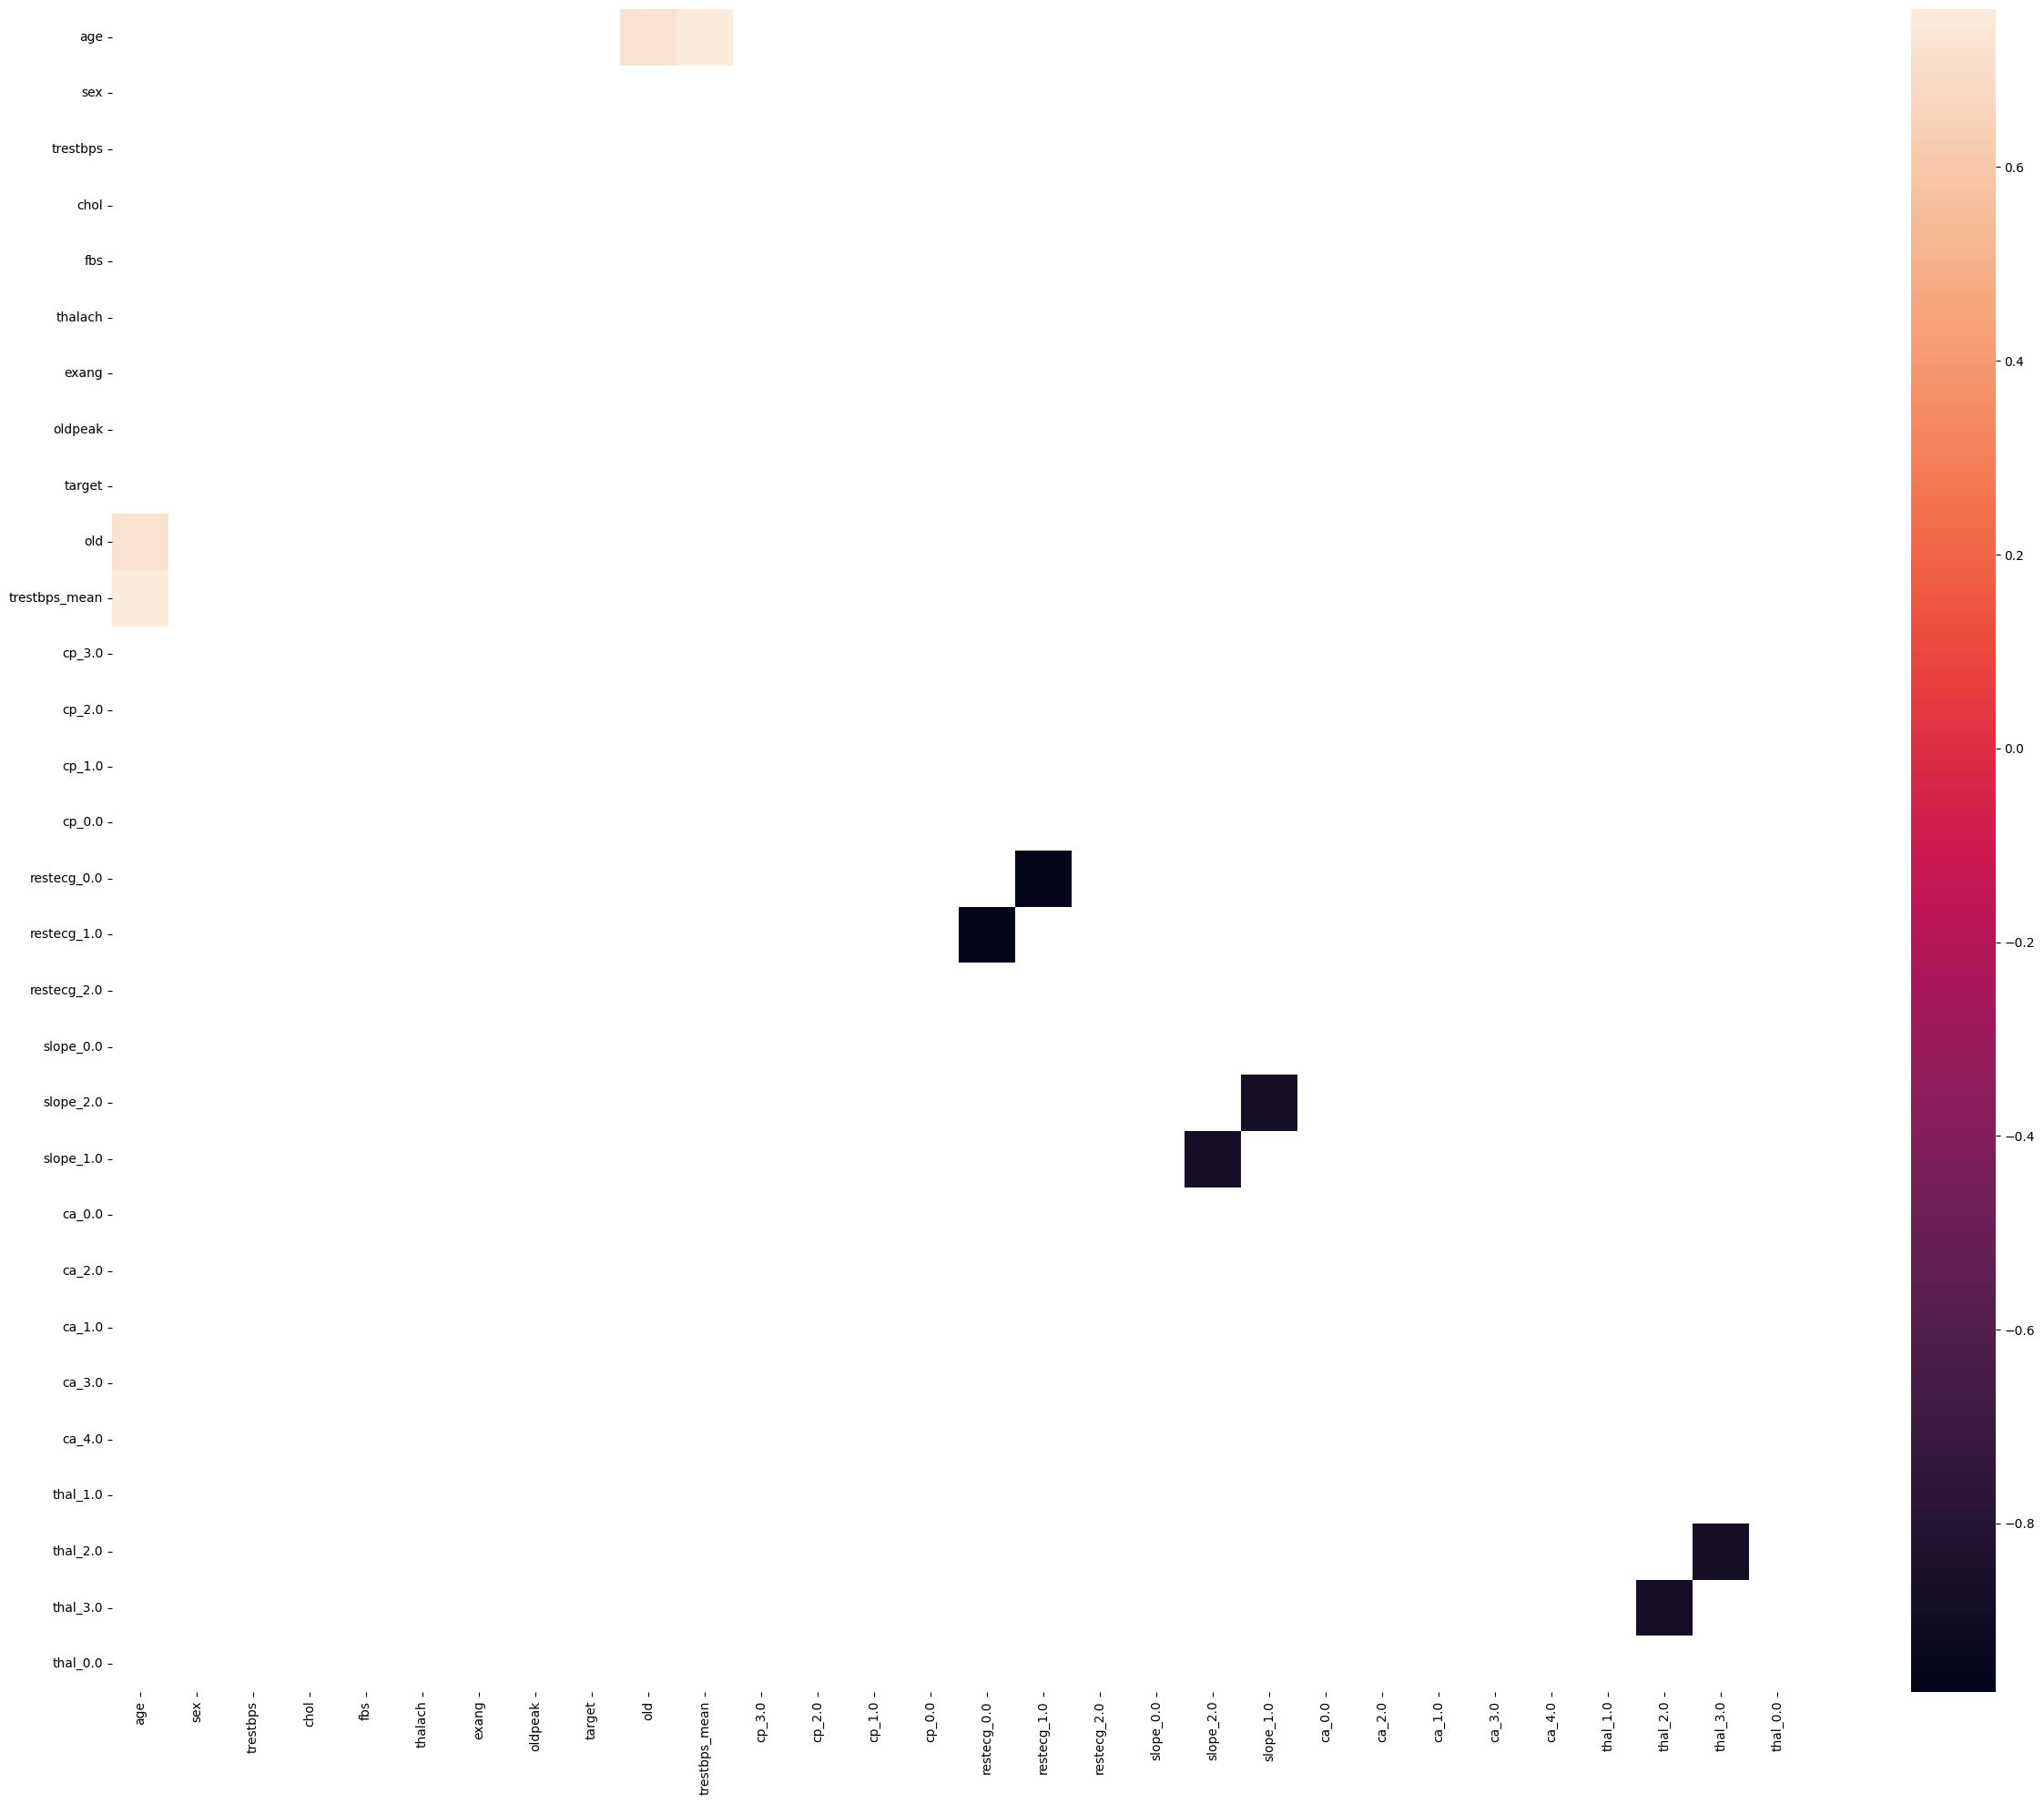

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[((corr_matrix >= 0.7) | (corr_matrix <= -0.7)) & (corr_matrix != 1)]

plt.figure(figsize=(30, 24))
sns.heatmap(filtered_corr_matrix);